# Giriş

İstanbul'da Süpermarket zincirlerinden birinde operasyon müdürlüğü yapan arkadaşlarımdan biriyle konuşuyordum. Tartışmamız üzerine, mağazalar zincirinin bayram mevsimi (Kurban&Ramazan Bayramları) başlamadan önce yapması gereken hazırlıklar hakkında konuşmaya başladık.

Bana, hangi ürünün kolay satacağını ve hangilerinin satmayacağını tahmin etmenin ne kadar önemli olduğunu söyledi. Kötü bir karar, müşterilerinizi rakip mağazalara yönlendirebilir ve yeni ürünler aramaya bırakabilir. Buradaki zorluk bitmiyor - ürünlerin farklı konumlardaki mağazalar için ve farklı tüketim tekniklerine sahip tüketiciler için çeşitli kategorilerdeki satışlarını tahmin etmeniz gerekiyor.

Arkadaşım zorluğu anlatırken, içimdeki veri bilimcisi gülümsemeye başladı! Niye ya dedim? Bugünkü çalışmamızda, size regresyon modelleri ve yukarıda belirtilen sorunların tahmin problemlerini çözmek için nasıl kullanılabileceği hakkında bilmeniz gereken her şeyi anlamaya çalışacağız.

Küçük bir beyin jimnastiği... Bir mağazanın satışının etkileneceğini, düşünebildiğiniz tüm faktörleri listelemek için bir dakikanızı ayırın. Her faktör için, bu faktörün çeşitli ürünlerin satışını neden ve nasıl etkileyeceği konusunda bir hipotez oluşturun. Örneğin, ürünlerin satışının mağazanın konumuna bağlı olmasını düşünün, çünkü her bölgedeki yerel halk farklı yaşam tarzlarına sahip olacak. Etiler'de bir marketin satacağı bayram çikolatası miktarı ile Esenyurt'taki benzer mağazanın çikolata satış  türü ve miktarı aynı olmayacaktır.

Benzer şekilde aklınıza gelebilecek tüm olası faktörleri listeleyin.

Mağazanızın konumu, ürünlerin mevcudiyeti, mağazanın büyüklüğü, ürünle ilgili belirli özellik, bir ürün için yapılan reklamlar, mağazada ki yerleşimi, satışlarınızın bağlı olacağı bazı özellikler olabilir.

Ne kadar farklı şeyler düşünebildiniz? 15'ten azsa, daha fazla zaman ayırın ve tekrar düşünün! Bu problem üzerinde çalışan tecrübeli bir veri bilimcisi için muhtemelen onlarca ve yüzlerce farklı durum düşünebilir.

Bu düşünce aklımda, size böyle bir veri seti verelim - "The Big Mart Sales". Veri setinde, bir zincirin Çoklu çıkışları için Satış bilgisine sahip satışlarımız var.

- Konu Başlıklarımız.
- 1- Tahmin için basit bir model oluşturma (Simple models for Prediction)
- 2- Doğrusal Regresyon(Linear Regression)
- 3- En iyi çizgi uygumu (The Line of Best Fit)
- 4- Dereceli Azalma(Gradient Descent)
- 5- Tahmin için Doğrusal regrasyon algoritmasının kullanılması(Using Linear Regression for prediction)
- 6- Modelin oluşturulması ve R kare &Ayarlanmış R kare değerlerinin bulunması(Evaluate your Model – R square and Adjusted R squared)
- 7- Veri setinde bulunan tüm bağımsız değişkenleri kullanarak tahmin yapma(Using all the features for prediction)
- 8- Polynom Regresyonu(Polynomial Regression)
- 9-  Bias and Variance
- 10- Regularization
- 11- Ridge Regression
- 12- Lasso Regression
- 13- ElasticNet Regression
- 14- Regularizasyon türleri (Types of Regularization Techniques)

## 1. Tahmin için basit modeller Oluşturma
Başlamak için birkaç basit yol kullanarak tahminlerde bulunmaya çalışalım. Sizce bir malın satışını tahmin etmenin en basit yolu ne olurdu?

  **-Model 1 - Ortalama satışlar:**
Herhangi bir makine öğrenmesi bilgisi olmadan bile, bir öğenin satışını tahmin etmek zorunda kalırsanız tahmin olarak son birkaç günün ortalaması olacağını söyleyebiliriz. (ay/hafta)

Başlamak için iyi bir düşünce ama aynı zamanda bir soruyu da beraberinde getiriyor - bu model ne kadar iyi?

Bu durum modelimizin ne kadar iyi olduğunu değerlendirebileceğimiz çeşitli yollar olduğunu ortaya koyuyor. En yaygın yol Ortalama Karesel Hata(mse). Şimdi gelin modelimizi nasıl ölçeceğimizi anlayalım.

*Hatalı Tahmin Sakıncaları*
Bir modelin ne kadar iyi olduğunu değerlendirmek için, yanlış tahminlerin etkisini anlayalım. Satışları olabileceğinden daha yüksek tahmin edersek, mağaza fazla miktarda para harcayarak gereksiz stok düzenlemelerine gidebilir. Diğer taraftan, çok düşük tahmin edersek satış fırsatlarını kaybedebiliriz.

Dolayısıyla, hatayı hesaplamanın en basit yolu, öngörülen(predicted) ve gerçekleşen(actual) değerlerdeki farkı hesaplamak olacaktır. Ancak, basitçe onları eklersek, iptal ederler, bu yüzden eklemeden önce bu hataların karelerini alırız. Veri puanlarının sayısına bağlı olmaması gerektiğinden, ortalama bir hatayı hesaplamak için onları veri noktalarının sayısına bölmemiz gerekiyor. 
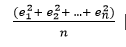

Bu ortalama kare hatası olarak bilinir.

İşte e1, e2…. (errors) gerçek ve öngörülen değerler arasındaki farktır.

 

Öyleyse, ilk modelimizde ortalama kare hatası ne olurdu bakalım ? Tüm veri noktaları için ortalamayı tahmin ederken, ortalama bir kare hata elde ediyoruz = 29,111,799. Görüldüğü kadarı ile çok büyük bir hataya benziyor. Ortalama değeri basitçe tahmin etmek o kadar da kolay olmayabilir.

Hatayı azaltmak için bir şeyler yapabilecek miyiz görelim.

**Model 2 - Bölgeye Göre Ortalama Satış:** Bir ürünün satışında yerin hayati bir rol oynadığını biliyoruz. Örneğin, İstanbul'da otomobil satışlarının Nevşehir'deki satışlardan çok daha yüksek olacağını söyleyebiliriz. Bu nedenle, ‘Outlet_Location_Type’ sütununun verilerini kullanalım.
Dolayısıyla, her bir yer(bölge) türü için ortalama satışları hesaplayalım ve buna göre tahmin yapalım.

Aynısını tahmin ederken, önceki durumumuzdan daha az olan mse = 28,775,386 alıyoruz. Böylece karakteristik bir konum kullanarak hatayı azalttığımızı fark edebiliriz ama çokta büyük bir azalma olmadı.

Şimdi, satışların bağlı olacağı birden fazla özellik varsa ki vardır. Bu bilgileri kullanarak satışları nasıl tahmin edebileceğiz? Bu noktada Doğrusal gerileme(Linear Regression) bizim yardımımıza yetişiyor.

## 2. Doğrusal Regresyon
Doğrusal regresyon, yordayıcı(tahminsel-predictive) modelleme için en basit ve en yaygın kullanılan istatistiksel tekniktir. Temel olarak bize, bizim özelliklerimizin [bu çalışmada satışlar] bağımlı olduğu bağımsız değişkenler olarak sahip olduğumuz bir denklem verir.

Peki denklem neye benziyor? Doğrusal regresyon denklemi şöyle görünür: 

Burada, bağımlı değişkenimiz (Satış) olarak Y sahibiz, X’ler bağımsız değişkenlerdir ve diğer Theta değerleri ise ağırlık katsayılarıdır. Katsayılar temel olarak özelliklerine, önemlerine göre verilen ağırlıklardır. Örneğin, bir öğenin satışının, mağazanın büyüklüğüne kıyasla konum türüne daha fazla bağımlı olacağına inanırsak, bu, birinci öneme sahip bir şehirdeki satışların 3.öneme sahip bir şehirdekinden daha küçük bir satış olmasına rağmen ağırlığının daha fazla olacağı anlamına gelir. Bu nedenle, konum türü katsayısı depo boyutundan daha fazla olacaktır.

Öyleyse, öncelikle sadece bir özellik olan(single variate), yani sadece bir bağımsız değişkeni olan lineer regresyonu anlamaya çalışalım. Dolayısıyla denklemimiz şöyle olur, 

Bu denkleme, basit doğrusal regresyon denlemi denir. “Θ0” doğrunun Y eksenini kestiği noktayı ve , ‘Θ1' çizginin eğimini temsil eder. Satış ve MRP arasındaki aşağıdaki grafiğe göz atalım.

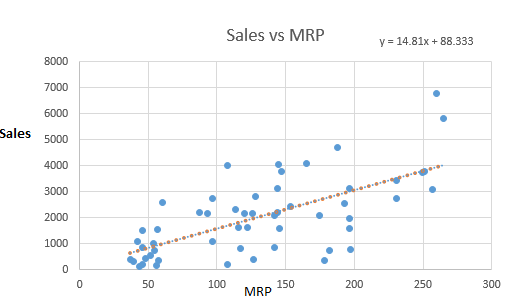

Şaşırtıcı bir şekilde, bir ürünün satışlarının MRP'deki artışla arttığını görebiliriz. Bu nedenle noktalı kırmızı çizgi, regresyon çizgimizi veya en uygun çizgiyi temsil eder. Evet işte aradığımız soru şu ki, biz bu çizgiyi nasıl bulacağız?

## 3. En Uygun Çizgiyi Bulma
Aşağıda görebileceğiniz gibi, Satışları MRP'lerine göre tahmin etmek için kullanılabilecek birçok satır olabilir. Peki, en uygun hattı veya regresyon hattını nasıl seçeriz?

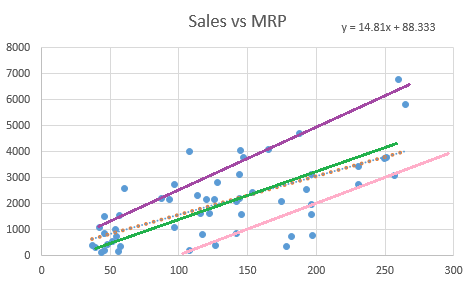

En uygun çizginin asıl amacı, öngörülen değerlerimizin gerçek değerlerimizden çok uzak olan değerleri tahmin etmenin bir anlamı olmadığı için gerçek değerlerimizle ya da gözlenen değerlerle daha yakın olması gerektiğidir. Başka bir deyişle, bizim tarafımızdan öngörülen değerler ile gözlemlenen değerler arasındaki farkı asgariye indirgeme eğilimidir. Hatanın grafiksel gösterimi aşağıda gösterilmiştir. Bu hatalar artıklar(residuals) olarak da adlandırılır. Artıklar, öngörülen(predicted) ile gerçek(actual) değer arasındaki farkı gösteren dikey çizgilerle belirtilir.

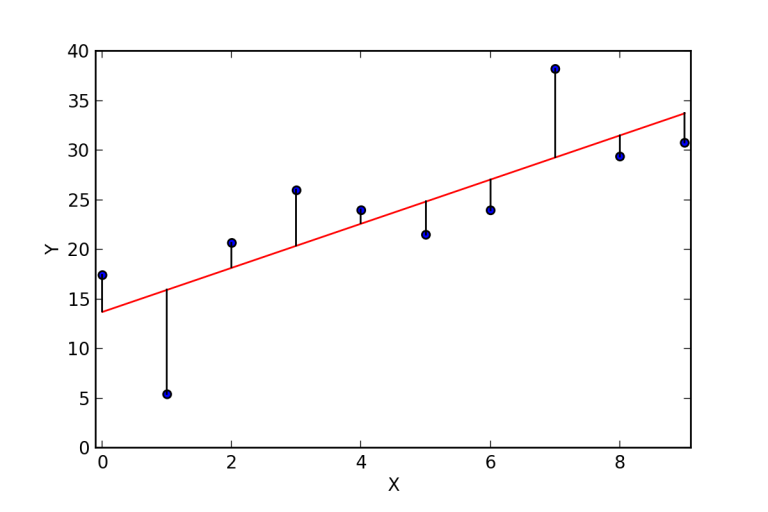

Tamam, şimdi asıl amacımızın hatayı bulmak ve onu en aza indirgemek olduğunu biliyoruz. Fakat ondan önce, hatayı hesaplamak için ilk kısım ile nasıl baş edeceğimizi düşünelim. Hatanın bizim tarafımızdan tahmin edilen değer ile gözlenen değer arasındaki fark olduğunu zaten biliyoruz. Hatayı hesaplayabileceğimiz üç yolu ele alalım:

    - **Artıkların toplamı (∑ (Y - s (X)))** - Olumlu ve olumsuz hataların iptal edilmesine neden olabilir.
    - **Artıkların mutlak değerinin toplamı (∑ | Y-h (X) |)** - mutlak değer hataların iptalini önler
    - **Artıkların karelerinin toplamı (∑ (Yh (X)) 2)** - Uygulamada çoğunlukla kullanılan yöntemdir, çünkü burada daha küçük hatayla karşılaştırıldığında daha yüksek hata değerini daha fazla cezalandırırız, burada büyük hatalar arasında önemli bir fark vardır. Ve en iyi çizgiyi ayırt etmeyi ve seçmeyi kolaylaştıran küçük hatalar yöntemi ile belirleyebiliriz.
    
Bu nedenle, bu artıkların karelerinin toplamı şu şekildedir:

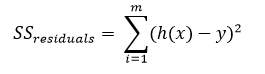

burada, h (x) bizim tarafımızdan tahmin edilen değerdir, h (x) = Θ1 * x + Θ0, y gerçek değerlerdir ve m ise eğitim setindeki satırların sayısıdır(yani gözlemlerin sayısı).

**Maliyet İşlevi(The Cost Function)**
Şimdi, satışların daha yüksek olacağını öngördük ve dükkanın boyutunu artırdık. Ancak dükkanın büyüklüğünün artmasına rağmen, bu mağazadaki satışların o kadar artmadığını fark ettik, şimdi ne yapmamız gerekir? Bu durumda dükkanın büyüklüğünün arttırılmasında uygulanan maliyetin, bize olumsuz sonuçlar verdiğini gördük şimdi bu olumsuz sonuçları nasıl değerlendirmeliyiz?

Şimdi sonucumuz olumsuz olduğundan dolayı bu maliyetleri minimize etmemiz gerekiyor. Bu nedenle, temel olarak modelin hatasını tanımlamak ve ölçmek için kullanılan bir maliyet fonksiyonunu tanıtıyoruz.

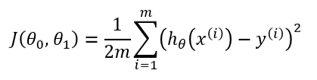

Eğer bu denkleme dikkatlice bakarsanız, denklem kare hataların toplamına benzer, burada matematiği kolaylaştırmak için formül 1 / 2m çarpanı ile çarpılır.

Dolayısıyla, öngörümüzü iyileştirmek için maliyet işlevini(cost function) en aza indirmemiz gerekiyor. Bu amaçla gradyan iniş(Gradient Descent) algoritmasını kullanıyoruz. Haydi bakalım şimdi de Gradient Descent(dereceli iniş) algoritmasının nasıl çalıştığını anlayalım, çünkü işlemlerimizde açık bir nokta bırakmadan yapılanları tam olarak anlamalıyızki bilinmeyen hiç bir nokta kalmasın ve konuya hakimiyetimiz tam olsun.

## 4. Dereceli İniş(Gradient Descent)
Bir örnek ile ele alalım, elimizde bir deknlem var ve bu denklemin minimum değerini bulmamız gerekiyor,

Y = 5x + 4x ^ 2. Matematikte, bu denklemin türevini x'e göre alıp onu sıfıra eşitlersek bu denklemin minumum değeriniz buluruz. Bu nedenle, bu değeri değiştirmek bize bu denklemin minimum değerini verebilir.

Dereceli iniş(gradient descent) benzer şekilde çalışır. Maliyet fonksiyonunun minimum olacağı bir nokta bulmak için tekrarlı olarak güncellenir. Dereceli iniş fonksiyonunu derinlemesine incelemek istiyorsanız, [bu makaleyi](https://www.analyticsvidhya.com/blog/2017/03/introduction-to-gradient-descent-algorithm-along-its-variants/) gözden geçirmenizi tavsiye ederim.

## 5. Tahmin için Doğrusal Regresyon Kullanımı
Şimdi, büyük mart satış(big mart sales) sorunumuz için Satışları tahmin etmek amacıyla Doğrusal Regresyon kullanmaya başlayalım.

 **Model 3 - Doğrusal Regresyona Giriş:** Önceki durumdan çıkardığımız sonuçlara göre, eğer doğru özellikleri kullanırsak tahmin doğruluğumuzu artıracağını biliyoruz bu da bize gösteriyorki yapacağımız işte eğer yeterli alan bilgisine sahip isek kuracağımız modelde kullanacağımız özellikleri seçmekte daha kolay olacaktır. Şimdi, satışları tahmin etmek için MRP ve Mağaza kuruluş yılı olarak iki özellik kullanalım.
Şimdi, sadece bu iki özelliği dikkate alarak python'da doğrusal bir regresyon modeli oluşturalım.

In [27]:
# Temel Kütüphaneleri çalışma ortamına ekleyerek başlayalım

import numpy as np

import pandas as pd

from pandas import Series, DataFrame

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [28]:
train = pd.read_csv('../input/Train_UWu5bXk.csv')
test = pd.read_csv('../input/Test_u94Q5KV.csv')

In [29]:
# linear regression algoritmasını sklearn kütüphanesinden yüklüyoruz.

from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

#Veriyi parçalıyoruz, çünkü çapraz doğrulama yapacağız

X = train.loc[:,['Outlet_Establishment_Year','Item_MRP']]

x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)

In [30]:
#Modelimizi eğitebiliriz.

lreg.fit(x_train,y_train)

pred = lreg.predict(x_cv)

#Hataların karesel ortalamasına bakıyoruz
mse = np.mean((pred - y_cv)**2)

In [31]:
mse

1929808.3567921564


Bu durumda, model 2'den çok daha küçük olan bir mse = 1.973,797.57 değeri elde ettik. Bu da bize gösteriyorki, iki özellik yardımıyla tahmin etmek çok daha doğru sonuçlar verecektir.(ilk tahminde mse değeri =2.875.386) Doğrusal regresyon modelinin katsayılarına bir göz atalım.

In [32]:
# Katsayılara bir göz atalım(Yani denklemdeki thetalarımız)
coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(lreg.coef_)

coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-11.002903
1,Item_MRP,15.819980


(MRP)MaterialRequirementPlanning'nin yüksek bir katsayıya sahip olduğunu görüyoruz, yani fiyatı yüksek olan ürünlerin datışları daha iyi diyebiliriz.

## 6. Modelinizi Değerlendirme - R kare ve ayarlanmış R-kare
Evet şimdi sizce model ne kadar doğru? Bunu kontrol edebilmemiz için herhangi bir değerlendirme metriğimiz var mı? Aslında R-Square olarak bilinen bir metriğimiz var. Şimdi R-Square metriğini inceleyelim.

R-Square:
Y (bağımlı değişken) içindeki toplam değişimin ne kadarının X (bağımsız değişken) tarafından açıklanacağını belirler. Matematiksel olarak şu şekilde yazılabilir: 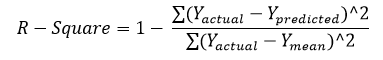

R-karenin değeri her zaman 0 ile 1 arasındadır, burada 0, modelin hedef değişkenindeki(Y) herhangi bir değişkenliği açıklamadığı anlamına gelir ve 1 değeri ise model hedef değişkeni tam olarak açıkladığı anlamına gelmektedir.
Şimdi gelin R-Square'i kontrol edelim,

In [33]:
lreg.score(x_cv,y_cv)
#Not: Sizin yapacağınız çalışmada Rkare değeri farklı çıkabilir.

0.30869373301906633

Bu çalışmada, R² %32'dir, yani bunun anlamı şudur; satışlardaki varyansın yalnızca % 32'si Kuruluş yılı ve MRP değişkenleri tarafından açıklanmaktadır.

Diğer bir ifade ile, kuruluş yılını ve M_R_P'yi biliyorsanız, satışlar hakkında doğru bir tahmin yapmak için %32'lik bir bilginiz var demektir.

Şimdi, modelime bir özellik daha eklersem, modelim değerleri gerçek değerine daha yakın tahmin edebilir mi? R-Square'in değeri yeni ekleyeceğimiz özellik ile artacak mı bunu kontrol edelim.

{**"Varyans:** Verilerin aritmetik ortalamadan sapmalarının karelerinin toplamıdır. Yani Standart Sapma'nın karesidir.}

**Model 4 - Daha fazla değişkenli doğrusal regresyon(Multivariate Linear Regression)**
Bir değişken yerine birden fazla değişken kullanarak öğelerin satışları hakkında doğru tahminlerde bulunma yeteneğimizi geliştirdiğini öğrendik.

Öyleyse, yeni durumda başka bir özelliği yani 'ağırlık' özelliğini de ekleyelim. Şimdi bu üç özellik ile bir regresyon modeli oluşturalım bakalım sonuçlara etkisi nasıl olacak?


**#ValueError: Input contains NaN, infinity or a value too large for dtype('float64').** Öğe ağırlıkları(Item_weight) sütununun bazı eksik değerleri olduğundan, bir hata üretiyor. Öyleyse diğer boş olmayan girişlerin ortalamasını alarak boş olan alanlara ortalama değeri atayalım.

In [34]:
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace = True)
train['Outlet_Establishment_Year'].fillna((train['Outlet_Establishment_Year'].mean()), inplace = True)

In [35]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [36]:
#Şimdi Modelimizi tekrar kontrol edelim artık eksik değer olan bir sütun kalmadığından bu işlemei yapabiliriz.
X = train.loc[:,['Outlet_Establishment_Year', 'Item_MRP', 'Item_Weight']]

#Elimizdeki veriyi tekrar parçalıyoruz.
x_train, x_cv, y_train, y_cv = train_test_split(X, train.Item_Outlet_Sales)
#Şimdi de Modeli Eğitelim
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
#Modeli eğittiğimize göre göre Şimdi tahminlerde bulunalım
pred = lreg.predict(x_cv)

In [38]:
#Şimdi de Ortalama Kare Hatası'na(mse)'ye bakalım'
mse = np.mean((pred - y_cv)**2)

mse

2022839.2624439425

In [39]:
# Şimdi Katsayıları kontrol edelim bakalım nasıl bir korelasyon ilişkileri var.
coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(lreg.coef_)

coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-9.580938
1,Item_MRP,15.622092
2,Item_Weight,-1.174244


In [40]:
#Son duruma göre R-Square değerimize bakalım ve tahmin yeteneğimizin ne kadar olduğunu görelim.

lreg.score(x_cv, y_cv)

0.31140892959481103

Yukarıdaki sonuçtan anlaşılacağı üzere, mse'nin daha da azaldığını görüyoruz. R-kare değerinde ise bir artış var, bu sonuç bize gösteriyorki yeni değerin ağırlığını ilave etmenin modelimiz için yararlı olduğu anlamına mı geliyor? Şimdi bunu inceleyelim.

### Ayarlanmış R- Kare(Adjusted R-Squared)
R2'nin tek sakıncası, modelimize yeni öngörücüler (X) eklenirse, R2'nin yalnızca yükselmesi veya sabit kalması, ancak asla düşmemesidir. Modelimizin karmaşıklığını artırarak daha doğru hale getirip getirmediğimizi kontrol edelim.

Düzeltilmiş R-Kare, modeldeki öngörücülerin(X) sayısına göre ayarlanmış, R-Kare'nin değiştirilmiş şeklidir. Modelin serbestlik derecesini içerir. Düzeltilmiş R-Kare sadece yeni terim model doğruluğunu iyileştirirse artar.

*Denklemdeki harflerin anlamları;

R2 = R kare örnek sayısı

p = Tahmin edicilerin sayısı

N = Toplam örnek sayısı

## 7. Tahmin için tüm özellikleri kullanma
Şimdi tüm özellikleri içeren bir model yapalım. Regresyon modellerini oluştururken sadece sürekli özellikleri kullandık. Bunun nedeni, kategorik değişkenleri doğrusal regresyon modelinde kullanmadan önce farklı şekilde ele almamız gerektiğidir. Onları uygun hale getirmek için farklı teknikler var, burada bir sıcak kodlama(one-hot encoding) kullandık (bir kategorik değişkenin her sınıfını bir özellik olarak dönüştürüyoruz). Bunun dışında çıkış boyutu için eksik olan değerleri de belirledik.

In [41]:
# Regresyon modeli için veri ön işleme adımları
# Eksik değerleri öncelikle ele alıyoruz ve eksik alanları dolduruyoruz.
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))
train['Outlet_Establishment_Year'] =2013 - train['Outlet_Establishment_Year']

train['Outlet_Size'].fillna('Small', inplace = True)

#Yeni bir değişken oluşturarak kategorik değişkenleri sürekli değişkenlere çeviriyoruz(one -hot-encoding).
mylist = list(train.select_dtypes(include =['object']).columns)

dummies = pd.get_dummies(train[mylist], prefix = mylist)

train.drop(mylist, axis = 1, inplace = True)

X = pd.concat([train, dummies], axis = 1)

## Modelimizi Oluşturalım

In [42]:
from sklearn.linear_model import LinearRegression
# importing linear regression
lreg = LinearRegression()

# for cross validation

from sklearn.model_selection import train_test_split

X = train.drop('Item_Outlet_Sales',1)

x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales, test_size =0.3)

In [43]:
lreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
# Linear modelimizi eğitelim

lreg.fit(x_train,y_train)

# calculating mse

mse = np.mean((x_cv - y_cv)**2)

mse

# evaluation using r-square

lreg.score(x_cv, y_cv)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexes/base.py:3772: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


0.36584687828772455

Açıkçası, hem mse hem de R-kare'de büyük bir gelişme olduğunu görebiliyoruz, bu da modelimizin şimdi gerçek değerlere daha yakın değerler tahmin edebileceği anlamına geliyor.

### Modeliniz için doğru özellikleri seçme
Yüksek boyutlu bir veri kümesine sahip olduğumuzda, bazı değişkenler gereksiz bilgi verebileceğinden tüm değişkenleri kullanmak oldukça verimsiz olacaktır. Bağımlı değişkeni iyi açıklayabilmemizin yanı sıra bize doğru bir model veren doğru değişken setini seçmemizde önem arzetmektedir. Model için doğru değişken kümesini seçmenin birden fazla yolu vardır. Bunlardan ilki alan bilgisi olacaktır. Örneğin, satışları öngörürken, pazarlama çabalarının satışları olumlu yönde etkilemesi gerektiğini ve modelinizde önemli bir özellik olduğunu biliyoruz. Ayrıca, seçtiğimiz değişkenlerin kendi aralarında ilişkilendirilmemesi gerektiğine de dikkat etmeliyiz.

Değişkenleri manuel olarak seçmek yerine, ileri veya geri seçimi kullanarak bu işlemi otomatikleştirebiliriz.

    - İleriye doğru seçim, modeldeki en önemli yordayıcıyla(predictor) başlar ve her adım için yeni değişken ekler.
    - Geriye doğru ekleme, modeldeki tüm öngörücülerle(predictors) başlar ve her adım için en az anlamlı değişkeni kaldırır. Kriterler, R-kare, t-stat vb. Gibi herhangi bir istatistiksel ölçüme ayarlanabilir.

### Regresyon Alanlarının Yorumlanması
Aşağıdaki grafikte huniye benzer bir şekil görüyoruz. Hata terimlerinde sabit olmayan varyansın varlığı, heteroskedastisite(değişen varyans sorunu) ile sonuçlanır. Hata terimlerinin (artıkların) varyansının sabit olmadığını açıkça görebiliriz. Genel olarak, sabit olmayan varyans, aykırı değerlerin veya aşırı kaldıraç değerlerinin varlığında ortaya çıkar. Bu değerler çok fazla ağırlık alır, bu nedenle modelin performansını orantısız şekilde etkiler. Bu durum ortaya çıktığında, örnek dışına çıkma öngörüsünün güven aralığı gerçek dışı geniş ya da dar olma eğilimindedir.

Artık(residual) ve uygulanan değerleri şekle bakarak kolayca kontrol edebiliriz. Eğer heteroskedastisite mevcutsa, şekil aşağı da gösterildiği gibi bir huni şekli modeli sergileyecektir. Bu, model tarafından yakalanmayan verilerdeki doğrusal olmayan işaretlerini gösterir. Varsayımların ayrıntılı bir şekilde anlaşılması ve regresyon parsellerinin yorumlanması için [bu makaleyi](https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/) gözden geçirmenizi şiddetle tavsiye ederim.

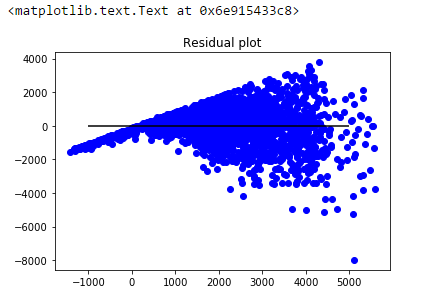

Bu doğrusal olmayan etkileri yakalamak için, polinom regresyonu olarak bilinen başka bir regresyon tipine sahibiz. Öyleyse şimdi Polinom regrasyonu anlamaya çalışalım.

### Regresyon Alanlarının Yorumlanması¶
Artık(residual) vs eğitilen değerler grafiğine bakınız.

## 8. Polynomial Regression
Polinom regresyonu, bağımsız değişkenin maksimum gücünün 1'den fazla olduğu bir başka regresyon şeklidir. Bu regresyon tekniğinde, en uygun çizgi doğrusal değil onun yerine eğri biçiminde kıvrımlıdır.

Kuadratik regresyon veya ikinci dereceden polinomlu regresyon, aşağıdaki denklemde verilir:

Y =Θ1 + Θ2x + Θ3x2

Şimdi aşağıda verilen çıktıya bir göz atalım.
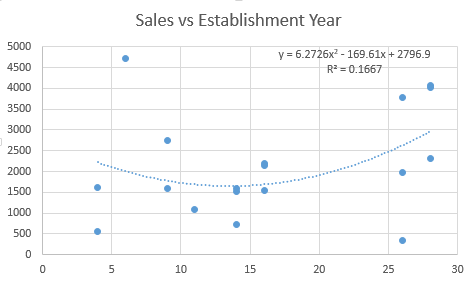

Açıkça, ikinci dereceden denklem, verilere basit doğrusal denklemden daha iyi uyar. Bu durumda, kuadratik regresyonun R-kare değerinin basit doğrusal regresyondan daha büyük olacağını mı düşünüyorsunuz? Kesinlikle evet, çünkü ikinci dereceden regresyon verilere doğrusal regresyondan daha iyi uyar. İkinci dereceden ve kübik polinomlar yaygın olsa da, daha yüksek dereceli polinomları da ekleyebilirsiniz.

Aşağıdaki şekil 6 dereceli bir polinom denkleminin davranışını göstermektedir.
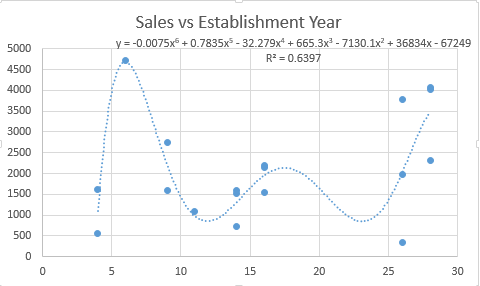

Dolayısıyla, veri kümesine uyması için daha yüksek dereceli polinomları kullanmanın her zaman daha iyi olduğunu mu düşünüyor musunuz? Bu düşünceniz için üzgünüm. Temel olarak, eğitim verilerimize uygun bir model oluşturduk ancak eğitim setinin dışındaki değişkenler arasındaki gerçek ilişkiyi tahmin edemiyoruz. Bu nedenle modelimiz test verileri üzerinde zayıf bir performans sergiliyor. Bu soruna aşırı uydurma(overfitting) denir. Ayrıca modelin yüksek varyansa ve düşük önyargıya sahip olduğunu söylüyoruz.

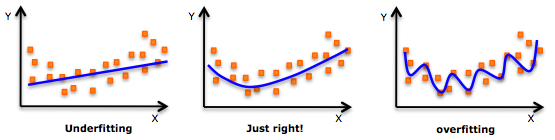
Benzer şekilde, eksiklik_az uyum(under-fitting) denilen başka bir problemimiz var, bu bizim modelimiz eğitim verisine uymadığında veya yeni verilere genelleme yapıldığında meydana gelir.

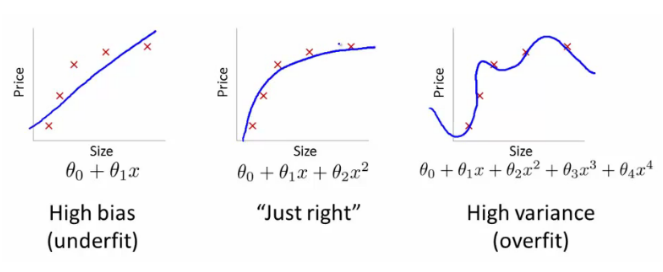

Modelimiz yüksek önyargı ve düşük değişkenliğe sahip olduğunda yetersizdir.

## 9. Regresyon modellerinde yanlılık ve varyans(Bias & Variance)
Bu önyargı ve varyans aslında ne anlama geliyor? Bunu okçuluk hedefleri örneğiyle anlayalım.

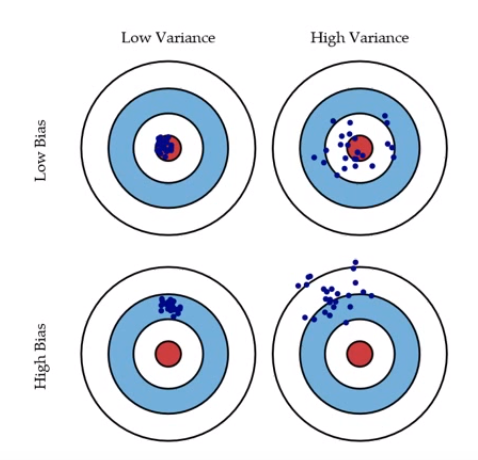
Diyelim ki çok doğru bir modelimiz var, eğer böyle ise modelimizin hatası düşük olacaktır, yani ilk şekilde gösterildiği gibi düşük önyargı(bias) ve düşük değişkenlik(varyans) anlamına gelir. Tüm veri noktaları boğa gözünün içine girer. Benzer şekilde, varyans artarsa, veri noktamızın yayılmasının artacağını ve bunun da daha az doğru tahminle sonuçlandığını söyleyebiliriz. Önyargı arttıkça, öngörülen değerimiz ile hata arasındaki fark artar ve gözlenen değerler artar.

Mükemmel bir modele sahip olmak için şimdi önyargı ve varyansın nasıl değerlendireceğiz? Aşağıdaki resme bakarak anlamaya çalışalım. 

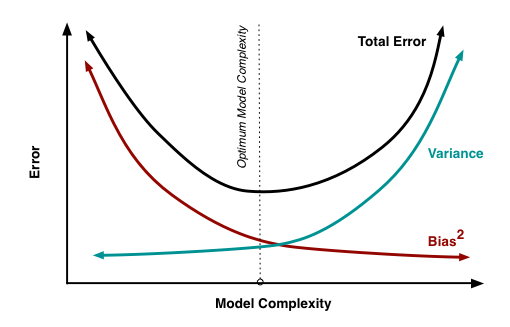

Modelimize daha fazla parametre eklediğimizde karmaşıklığı da artar, bu da varyansın artması ve önyargının azaltılması demektir. Yani fazla uydurma(overfitting) ile sonuçlanır. Bu nedenle, yanlılığımızdaki azalmanın varyanstaki artışa eşit olduğu modelimizde bir optimum nokta bulmamız gerekiyor. Uygulamada, bu noktayı bulmak için analitik bir yol yoktur. Peki yüksek sapma veya yüksek önyargı ile nasıl başa çıkılır?

Az öğrenme(underfitting) ya da yüksek önyargının üstesinden gelmek için, temel olarak modelimize yeni parametreler ekleyebiliriz; böylece model karmaşıklığı artar ve yüksek önyargı azalır.

Şimdi, bir regresyon modeli için Overfitting'i nasıl yenebiliriz?

Temel olarak, fazla uydurmanın(Overfitting) üstesinden gelmek için iki yöntem vardır,

    - Model karmaşıklığını azaltın(Reduce Model complexity)
    - Düzenlileştirme(Regularization) yapın 

Düzenlileştirme hakkında ve modelinizi daha genel hale getirmek için nasıl kullanacağınızı tartışacağız.

## 10. Düzenleme(Regularizasyon)
Modelinizi hazırladınız, çıktınızı tahmin ettiniz. Öyleyse neden düzenlileşmeye çalışmamız gerekiyor? Bu gerekli mi?

Bir yarışmaya katıldığınızı ve bu problemde sürekli bir değişkeni tahmin etmeniz gerektiğini varsayalım. Böylece doğrusal regresyon uyguladınız ve çıktınızı tahmin ettiniz. İşte bu kadar! Sen lider panosundasın o da güzel ama bazı işler ters gidiyor gibi...!!!. Ama beklemediğiniz şey şu ki, yine lider panosunda sizden başka birçok insan var. Ama her şeyi doğru yaptığımıza göre bu nasıl mümkün olabilir?

  - “Her şey mümkün olduğunca basit yapılmalı, ancak daha basitçe olmamalı - Albert Einstein”- 

Yaptığımız işlem çok basitti, herkeste bunu yaptı, şimdi de daha çok basitleştirmeye bakalım. Bu yüzden, kodumuzu düzenlileştirme(regularize) yardımı ile optimize etmeye çalışacağız.

Düzenleme için yaptığımız şey normalde aynı sayıda özelliği sürdürmemiz, fakat katsayıların büyüklüğünü azaltmamızdır yani j'leri. Katsayıları azaltmak bize nasıl yardımcı olacak?

Aşağıdaki regresyon modelimizdeki özellik katsayılarına bir göz atalım.

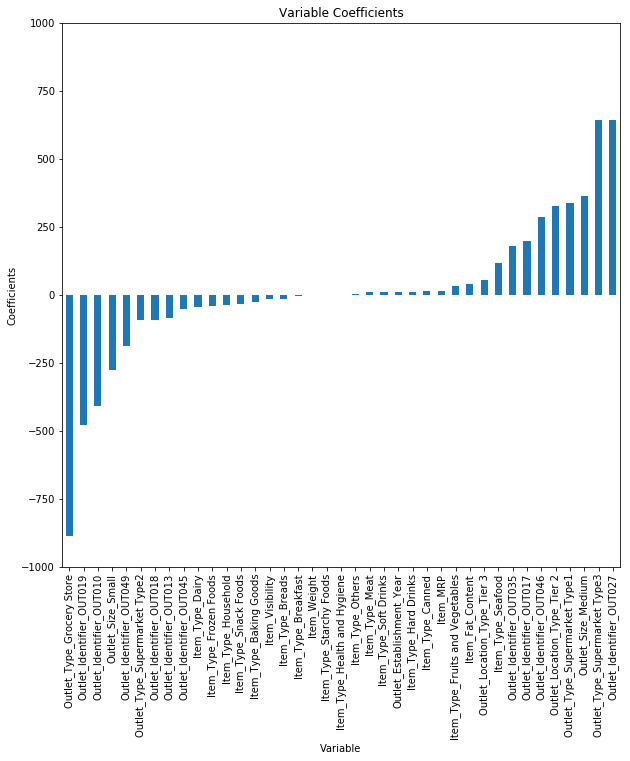

Outlet_Identifier_OUT027 ve Outlet_Type_Supermarket_Type3 (son 2 pozitif katsayı) katsayılarının geri kalan katsayılarla karşılaştırıldığında çok daha yüksek olduğunu görebiliriz. Bu nedenle, bir malzemenin toplam satışları bu iki özellikten daha fazla etkilenecektir.

Modelimizdeki katsayıların büyüklüğünü nasıl azaltabiliriz? Bu amaçla, bu sorunun üstesinden gelmek için düzenlileşmeyi kullanan farklı tipte regresyon tekniklerine sahibiz. Öyleyse onları tartışalım.

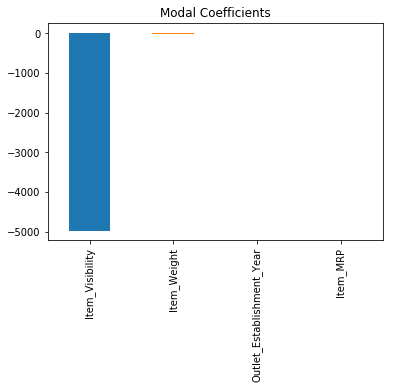

In [45]:
predictors = x_train.columns

coef = Series(lreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

## 11. Ridge Regresyonu
Öncelikle yukarıdaki problemimize uygulayalım ve sonuçlarımızı lineer regresyon modelimizden daha iyi performans gösterip göstermediğini kontrol edelim.

In [46]:
from sklearn.linear_model import Ridge

##training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

##calculating mse

mse = np.mean((pred - y_cv)**2)

In [47]:
mse

1878639.202958584

In [48]:
from sklearn.linear_model import Ridge

##training the model

ridgeReg = Ridge(alpha=0.5, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

##calculating mse

mse = np.mean((pred - y_cv)**2)
mse

2009862.2569499402

In [49]:
from sklearn.linear_model import Ridge

##training the model

ridgeReg = Ridge(alpha=5, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

##calculating mse

mse = np.mean((pred - y_cv)**2)
mse

2634760.1112261717

Dolayısıyla, modelimizde hafif bir gelişme olduğunu görebiliyoruz, çünkü R -square'ın değeri arttırıldı. Ridge'in hiperparametresi olan alfa değerinin, model tarafından otomatik olarak öğrenilmediğini, bunun yerine manuel olarak ayarlanması gerektiğini hatırımızda tutalım.

Burada alfa = 0.05'i göz önüne aldık. Fakat, farklı alfa değerlerini düşünelim ve her durum için katsayıları çizelim.

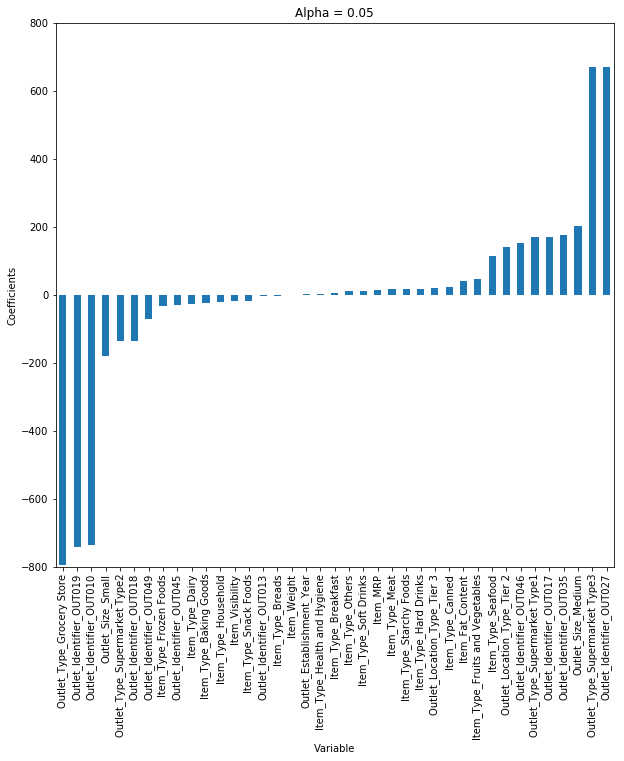
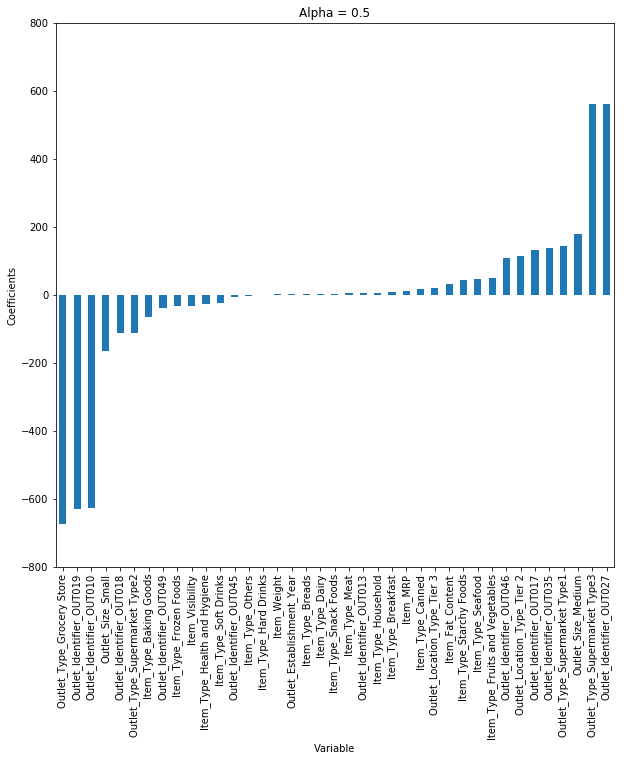
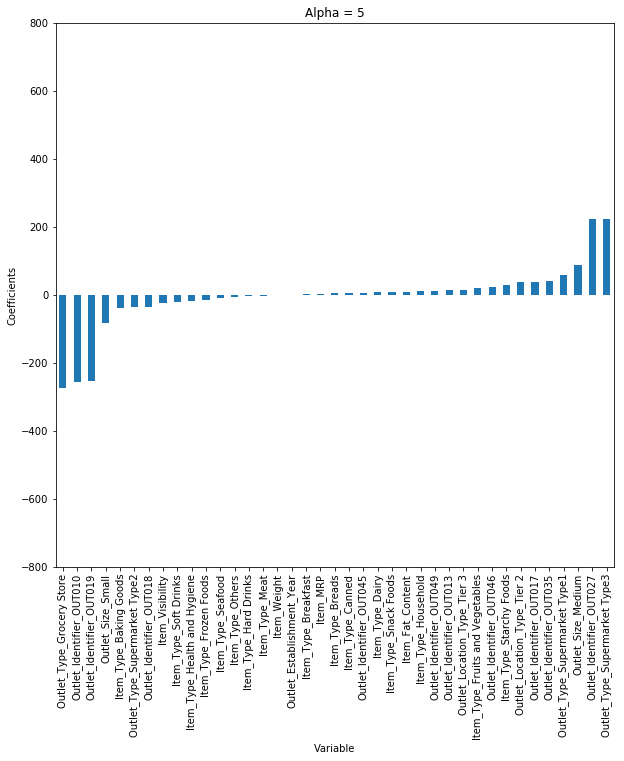
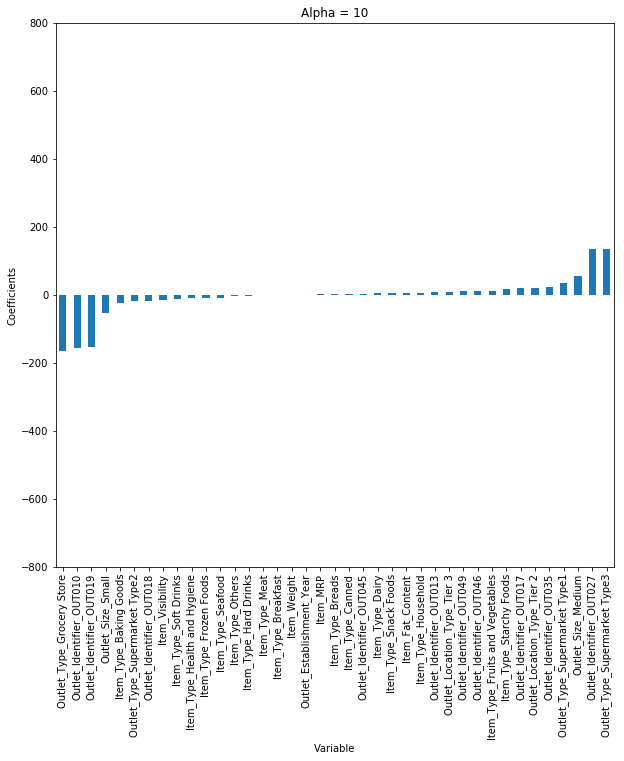

Alfa değerini artırdıkça katsayıların büyüklüğünün azaldığını, değerlerin sıfıra ulaştığını ancak mutlak sıfıra düşmediğini görebilirsiniz.

Ancak, her alfa için R-kare hesaplarsanız, R-kare değerinin alfa = 0,05'te maksimum olacağını göreceğiz. Bu yüzden akıllıca bir değer aralığında yineleyerek ve bize en düşük hata veren alfa değerini kullanarak seçmeliyiz.

Öyleyse, şimdi nasıl uygulanacağı hakkında bir fikriniz var ama biz matematik tarafına da bir göz atalım. Şimdiye kadar bizim fikrimiz temel olarak maliyet fonksiyonunu en aza indirgemekti, öyle ki şimdi öngörülen değerler istenen sonuca çok daha yakın.

Burada fark ederseniz, ceza terimi olarak bilinen fazladan bir terim ile karşılaşıyoruz. Burada verilen λ, aslında sırt(ridge) fonksiyonundaki alfa parametresi ile belirtilir. Bu yüzden alfa değerlerini değiştirerek, temel olarak ceza terimini kontrol ediyoruz. Alfa değerleri ne kadar yüksek olursa, ceza o kadar büyüktür ve bu nedenle katsayıların büyüklüğü azalır.

    -Önemli noktalar:
    -Parametreleri küçültür, bu nedenle çoğunlukla çoklu bağlantıyı önlemek için kullanılır.
    -Model karmaşıklığını, katsayılı büzülme ile azaltır.
    -L2 düzenlileştirme tekniğini kullanır. (bu çalışmada daha sonra tartışacağız) Şimdi düzenlileştirmeyi(regularization) de kullanan başka bir regresyon tekniği türünü inceleyelim.

## 12. Lasso regresyonu
LASSO ((Least Absolute Shrinkage Selector Operator))En Az Mutlak Büzülme Seçici Operatörü), ridge'e oldukça benzer, ancak büyük mart veriseti problemimizde uygulayarak aralarındaki farkı anlayabiliyoruz.

In [50]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_cv)

#calculating mse

mse = np.mean((pred - y_cv)**2)

mse

lassoReg.score(x_cv,y_cv)

0.36543064677590475

Gördüğümüz gibi, modelimizin hem(mse) değeri hem de R-karesinin değeri arttırıldı. Bu nedenle, Lasso modeli hem doğrusal hem de Ridge'den daha iyi tahmin ediyor olduğunu görebiliyoruz.

Yine alfa değerini değiştirelim ve katsayıları nasıl etkilediğini görelim.
            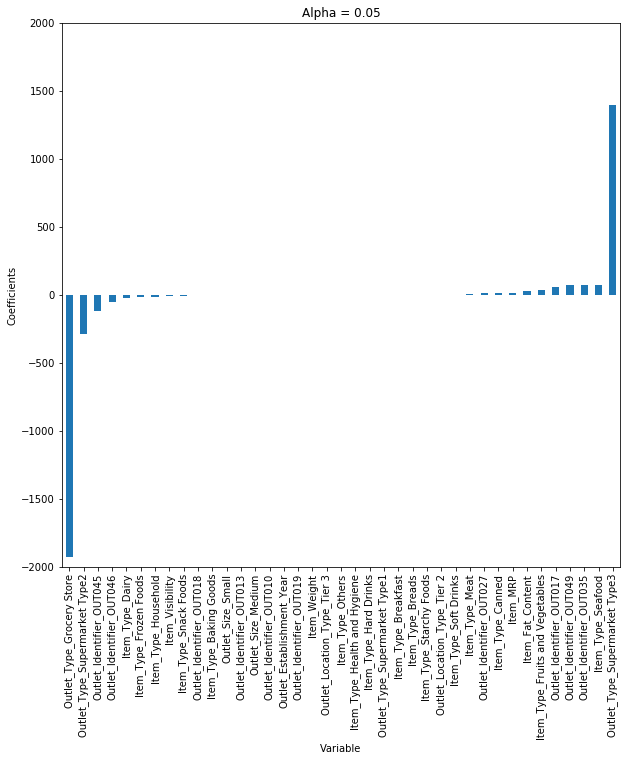

            ![lasso0.51.png](attachment:lasso0.51.png)
            
            
Bu nedenle, küçük alfa değerlerinde bile, katsayıların büyüklüğünün çok azaldığını görebiliriz. Grafiklere bakarak, Ridge ile Lasso fonksiyonları arasında bir fark bulabilir misiniz?

Alfa değerini artırdıkça katsayıların sıfıra yaklaştığını görüyoruz, ancak Lasso fonksiyonunda, daha küçük alfalarda bile, katsayılarımız mutlak sıfıra düşüyor. Bu nedenle, Lasso sadece bazı özellikleri seçerken diğerlerinin katsayılarını sıfıra indirir. Bu özellik, özellik seçimi olarak bilinir ve Ridge fonksiyonunda yoktur.

    - Lasso regresyonunun ardındaki matematik, Ridge'e benzediğini görebilirsinis, sadece farkın theta(Θ) kareleri eklemek yerine, Θ mutlak değerini eklediğimizi fark ediyoruz.
    
    ![lasso_math_formul.png](attachment:lasso_math_formul.png)

Burada da λ, değeri Lasso fonksiyonunda alfaya eşit olan bir hipermetredir.

Lasso için Önemli noktalar:

  - L1 düzenlileştirme tekniğini kullanır (bu makalenin ilerleyen kısımlarında ele alınacaktır)
  - Genellikle daha fazla sayıda özelliğe sahip olduğumuzda kullanılır, çünkü otomatik olarak özellik seçimi yapar.
Artık Ridge ve Lasso regresyonu hakkında temel bir anlayışa sahip olduğumuza göre, geniş bir veri setine sahip olduğumuz bir örneği düşünelim, 10,000 özelliğe sahip olduğunu varsayalım. Ve bazı bağımsız özelliklerin diğer bağımsız özellikler ile ilişkili olduğunu biliyoruz. Öyleyse, hangi regresyonun kullanıldığını düşünün, Rigde mi, Lasso mu?

Tek tek tartışalım. Eğer Ridge regresyonu uygularsak, tüm özelliklerini koruyacak, katsayıları daraltacaktır. Ancak sorun şu ki, model 10.000 özellik olduğundan hala karmaşık kalacaktır, bu nedenle düşük model performansına neden olabilir.

Ridge yerine lasso regresyonu uygularsak, Lasso regresyonu ile ilgili temel problem, korelasyonlu değişkenlere sahip olduğumuzda, sadece bir değişkeni korur ve diğer korelasyonlu değişkenleri sıfıra ayarlar. Bu muhtemelen modelimizde daha düşük doğrulukla sonuçlanan bir miktar bilgi kaybına yol açacaktır.

Öyleyse bu sorunun çözümü nedir? Aslında, temel olarak bir Ridge ve Lasso regresyonunun bir melezi olan *elastik net* regresyon olarak bilinen başka bir regresyon türüne sahibiz. Öyleyse gelin elastik net fonksiyonunu anlamaya çalışalım.

## 13. Elastik Net Regresyon
Teori kısmına girmeden önce, bunu büyük mart satış problemine uygulayalım. Ridge ve Lasso'dan daha iyi performans gösterir mi? Hadi kontrol edelim!

In [51]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(x_train,y_train)

pred_cv = ENreg.predict(x_cv)

#calculating mse

mse = np.mean((pred_cv - y_cv)**2)


ENreg.score(x_cv,y_cv) #R-Squar

0.3511729557483971

In [52]:
mse

1916258.0616073776

Şimdi Yukarıdaki çıktıları değerlendirelim; Hem Ridge'den hem de Lasso'dan çok daha az R-Square'in değerini olduğunu görüyoruz. Neden olduğunu düşünelim. Bu çöküşün arkasındaki sebep, temel olarak, çok fazla özelliğe sahip olmadığımızdır. Elastik regresyon genellikle büyük bir veri setine sahip olduğumuzda iyi çalışır.
Not, burada iki parametre alfa ve l1_ratio vardır. Öncelikle elastik ağda ne olduğunu ve Ridge ve Lasso'dan nasıl farklı olduğunu tartışalım.

Elastik ağ, temel olarak, hem L1 hem de L2 düzenlemesinin bir birleşimidir. Yani elastik ağı biliyorsanız, parametreleri ayarlayarak hem Ridge'i hem de Lasso'yu uygulayabilirsiniz. Dolayısıyla hem L1 hem de L2 ceza terimini kullanır, bu nedenle denklemi aşağıdaki gibi görünür:!

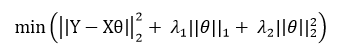

Peki L1 ve L2 ceza süresini kontrol etmek için lambdaları nasıl ayarlayacağız? Bir örnek ile anlayalım; Göletten balık tutmaya çalışıyorsunuz ve sadece bir ağınız var, o zaman ne yapardınız? Net olarak rasgele atar mısın? Hayır, aslında etrafta bir tane balık görene kadar bekleyeceksiniz, daha sonra temel olarak tüm balık grubunu toplamak için ağı bu yöne fırlatacaksınız. Dolayısıyla, birbirleriyle korele olsalar bile, yine de tüm gruba bakmak istiyoruz.

Elastik regresyon benzer şekilde çalışır. Diyelim ki, bir veri setinde bir grup korelasyonlu bağımsız değişkenimiz var, o zaman elastik ağ basitçe bu ilişkili değişkenlerden oluşan bir grup oluşturacaktır. Şimdi eğer bu grubun değişkenlerinden herhangi biri güçlü bir tahminci ise (yani bağımlı değişkenle güçlü bir ilişkiye sahip olmak anlamına gelir), o zaman tüm grubu modele dahil edeceğiz, çünkü diğer değişkenleri atlamak (Lasso'da yaptığımız gibi) olabilir. Yorumlama kabiliyeti bakımından bazı bilgilerin kaybedilmesiyle sonuçlanır, bu da düşük bir model performansına yol açar.

Bu nedenle, yukarıdaki koda bakarsanız, modeli tanımlarken alfa ve l1_ratio tanımlamamız gerekir. Alpha ve l1_ratio, L1 ve L2 cezalarını ayrı ayrı kontrol etmek istiyorsanız, buna göre ayarlayabileceğiniz parametrelerdir.

Aslında biz ;

Alpha = a + b ve l1_ratio = a / (a+b)
burada, a ve b ağırlıkları sırasıyla L1 ve L2 terimine verilmiştir. Böylece, alfa ve l1_ratio değerlerini değiştirdiğimizde a ve b, L1 ve L2 arasındaki değiş tokuşu kontrol edecek şekilde ayarlanır:

a (L1 terimi) + b (L2 terimi)

Alfa (veya a + b) = 1 olsun ve şimdi aşağıdakileri göz önünde bulundurun:

        - L1_ratio = 1 ise, l1_ratio formülüne bakarsak,
        - l1_ratio'nun sadece a = 1 ise b = 0 anlamına gelirse 1'e eşit olabileceğini görebiliriz. 
        Bu nedenle, bir Lasso olacak.
        - Benzer şekilde eğer l1_ratio = 0 ise, a = 0 anlamına gelir. O zaman ceza bir Ridge cezası olacak. 0 ile 1 arasındaki 1_ratio için ceza, Ridge ve Lasso kombinasyonudur.

Öyleyse alfa ve l1_ratio'yu ayarlayalım ve aşağıda verilen katsayıların alanlarından anlamaya çalışalım.

Artık Ridge, Lasso ve elastik ağ regresyonu hakkında temel bir bilgimiz var. Fakat bu sırada, temelde iki düzenleme türü olan iki terimle L1 ve L2 ile karşılaştık. Özetle, Lasso ve Ridge'ın özetlenmesi, sırasıyla L1 ve L2 düzeninin doğrudan uygulanmasıdır.

Ancak hala bilmek istiyorsanız, aşağıda onların arkasındaki kavramı açıkladım, bunada isterseniz bakabilirsiniz.

## 14. Düzenleme Tekniklerinin Türleri 
Hatırlayalım, hem Ridge'de hem de Lasso'da bir ceza terimi ekledik, ancak her iki durumda da terim farklıydı. Ridge'de, theta'nın karelerini, Lasso'da ise theta'nın mutlak değerini kullandık. Öyleyse neden sadece bu ikisi, başka olasılıklar olamaz mı?

Aslında, tarafından belirtilen normalleştirme teriminde, parametrenin farklı sıralama düzenleriyle farklı olası düzenleme seçenekleri vardır. Bu daha genel olarak Lp düzenleyici olarak bilinir.

Bazılarını çizerek görselleştirmeye çalışalım. Görselleştirmeyi kolaylaştırmak için, onları 2D uzayda çizelim. Bunun için iki parametremiz olduğunu varsayalım. Şimdi, diyelim ki p = 1 terimimiz var. Bu çizgi denklemini çizemez miyiz? Benzer şekilde, p'nin farklı değerleri için çizim aşağıda verilmiştir.

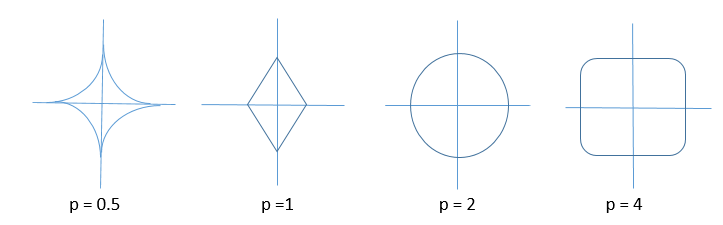


Yukarıdaki grafiklerde eksen parametreleri belirtir (Θ1 ve Θ2). Onları tek tek inceleyelim.

P = 0.5 için, yalnızca diğer parametre çok küçükse, bir parametrenin yalnızca büyük değerlerini alabiliriz. P = 1 için, parametredeki artışın diğerindeki düşüşle tam olarak dengelendiği mutlak değerlerin toplamını elde ederiz. P = 2 için bir daire alıyoruz ve daha büyük p değerleri için yuvarlak kare şekline yaklaşıyor.

En yaygın kullanılan iki düzenleme, içinde L1 ve L2 düzenlemesi olarak bilinen p = 1 ve p = 2 değerlerine sahibiz.

Aşağıda verilen şekle dikkatlice bakın. Mavi şekil normalleştirme terimini ifade eder ve mevcut diğer şekil en küçük kare hatamızı (veya veri terimini) belirtir.

İlk rakam L1 ve ikincisi L2 düzenlenmesi içindir. Siyah nokta, en küçük kare hatasının bu noktada en aza indirildiğini ve görüldüğü gibi, ondan hareket ettikçe kuadrik olarak arttığını ve tüm parametrelerin sıfır olduğu başlangıçta düzenlenme süresini en aza indirdiğini gösteriyor.

Şimdi soru şu ki, maliyet fonksiyonumuz hangi noktada minimum olacak? Cevap, kuadrik olarak arttığı için, her iki terimin toplamı, ilk kesiştiği noktada en aza indirilecektir.

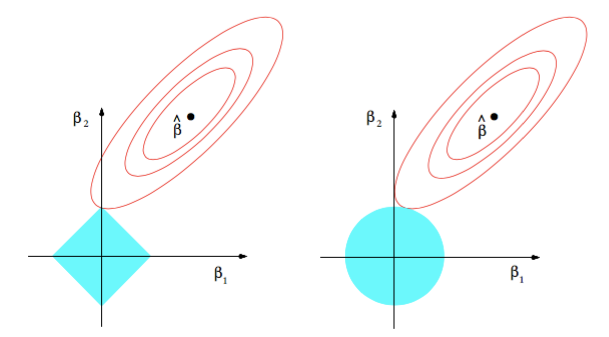

L2 normalizasyon eğrisine bir bakın. L2 düzenleyicinin oluşturduğu şekil bir daire olduğundan, ondan uzaklaştıkça dörtlü olarak artar. L2 optimum (temel olarak kesişme noktasıdır) eksen çizgileri üzerine ancak minimum MSE (ortalama kare hatası veya şekildeki siyah nokta) aynı zamanda tam olarak eksendeyken düşebilir. Ancak L1 durumunda, L1 optimum ekseni eksen çizgisinde olabilir, çünkü konturu keskindir ve bu nedenle eksen üzerinde düşme olasılığı yüksek olan etkileşim noktası vardır. Bu nedenle, minimum MSE eksende olmasa bile, eksen çizgisinde kesişmek mümkündür. Kavşak noktası eksenlerin üzerine düşerse, seyrek olarak bilinir.

Bu nedenle, L1 modelimizi depolamak ve hesaplamak için daha verimli hale getiren ve ayrıca özelliğin önemini kontrol etmede yardımcı olan bir miktar sparite seviyesi sunar, çünkü önemli olmayan özellikler tam olarak sıfıra ayarlanabilir.

## Bitiş Notları
Umarım şimdi, doğrusal regresyonun arkasındaki bilimi ve bunun nasıl uygulanacağını ve modelinizi geliştirmek için nasıl daha iyi duruma getireceğimizi anlamaya başladık.

“Bilgi hazinedir ve uygulama bunun anahtarıdır”

Bu nedenle, bazı problemleri çözerek ellerimizi kirletelim. Bunun iiçin "Big mart satış" problemiyle başlayabilir ve modelinizi bazı özellik mühendisliği ile geliştirmeye çalışabilirsiniz.

Not: Bu çalışma örneği ekteki[link](https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/)'den faydalanılarak hazırlanmıştır.